<a href="https://colab.research.google.com/github/KKOUWE/NumMet-Network-Design-Physarum-polycephalum-Ph/blob/main/China_Driveways.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traffic Flows (F_ij) between nodes (normalized):
From Beijing to Tianjin: 0.7232
From Beijing to Shijiazhuang: 0.4149
From Beijing to Taiyuan: 0.1838
From Beijing to Hohhot: 0.2053
From Beijing to Shenyang: 0.1662
From Beijing to Changchun: 0.0839
From Beijing to Harbin: 0.0745
From Beijing to Shanghai: 0.0908
From Beijing to Nanjing: 0.1725
From Beijing to Hangzhou: 0.1119


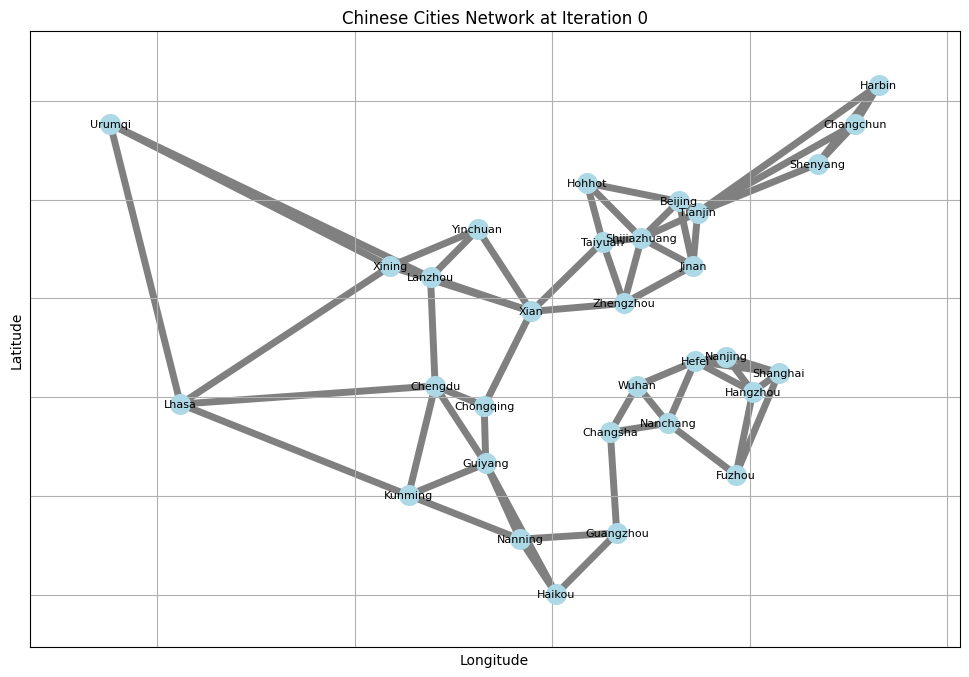

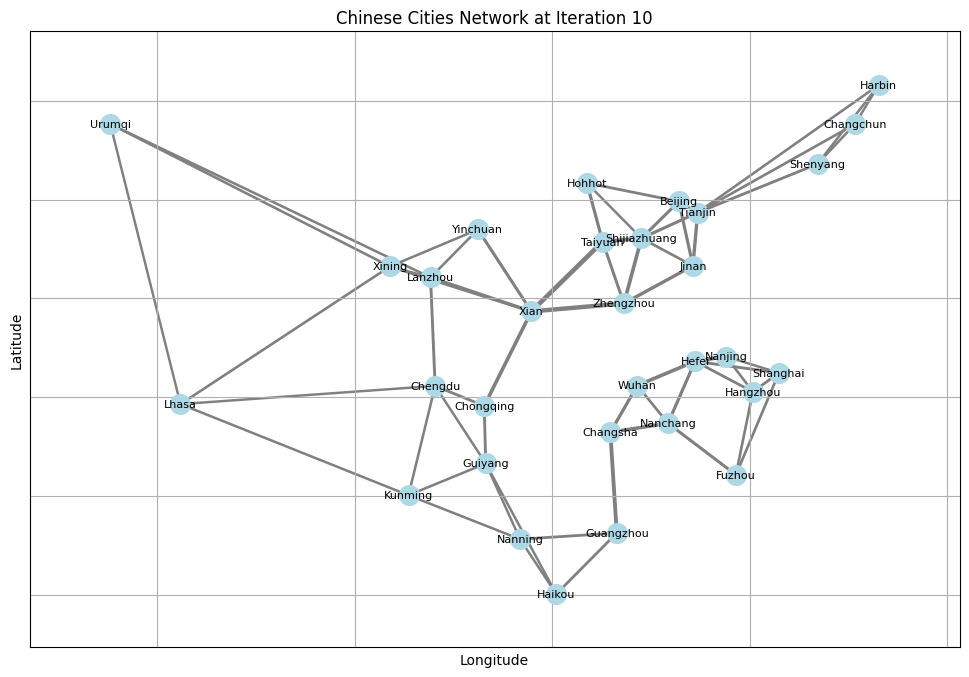

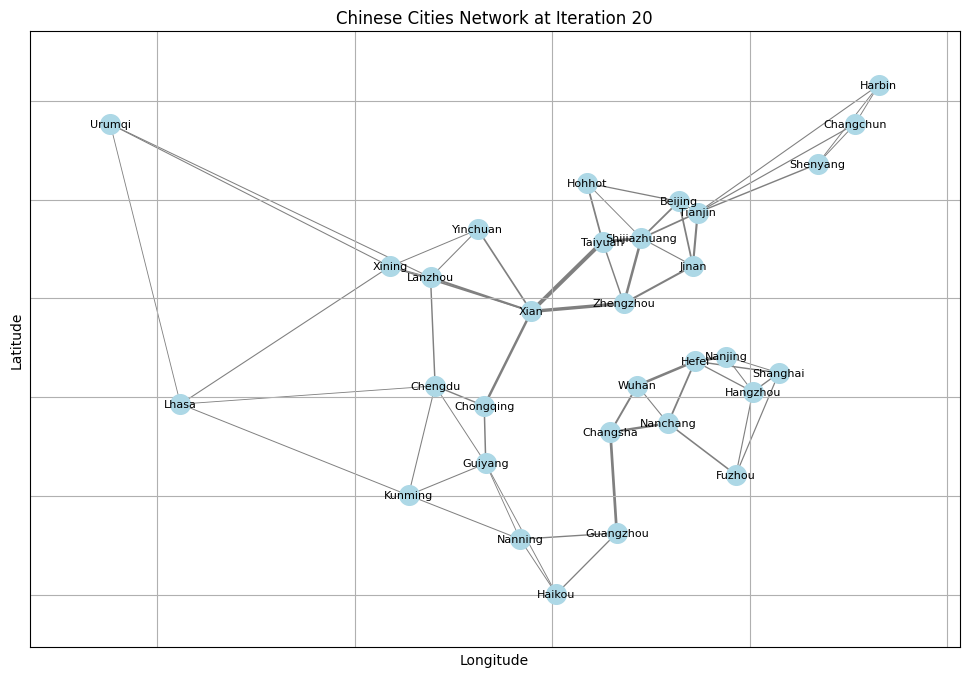

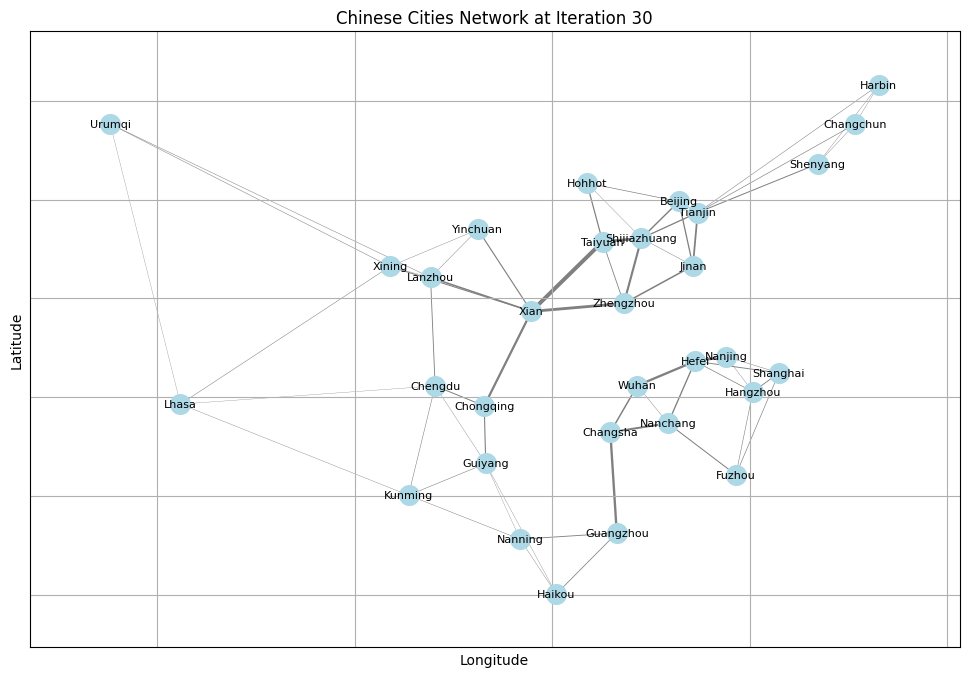

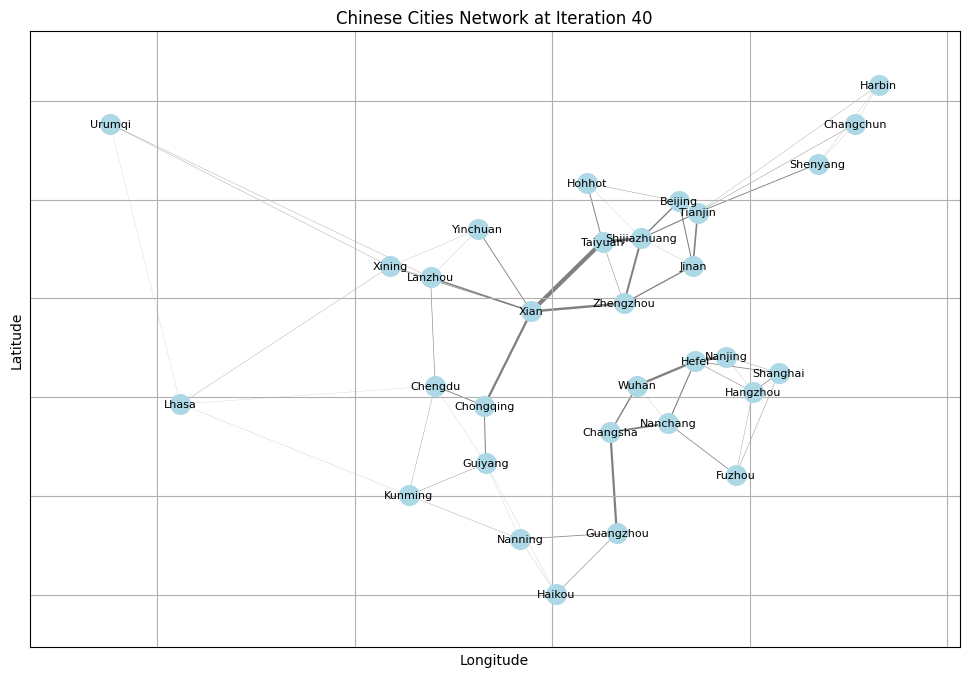

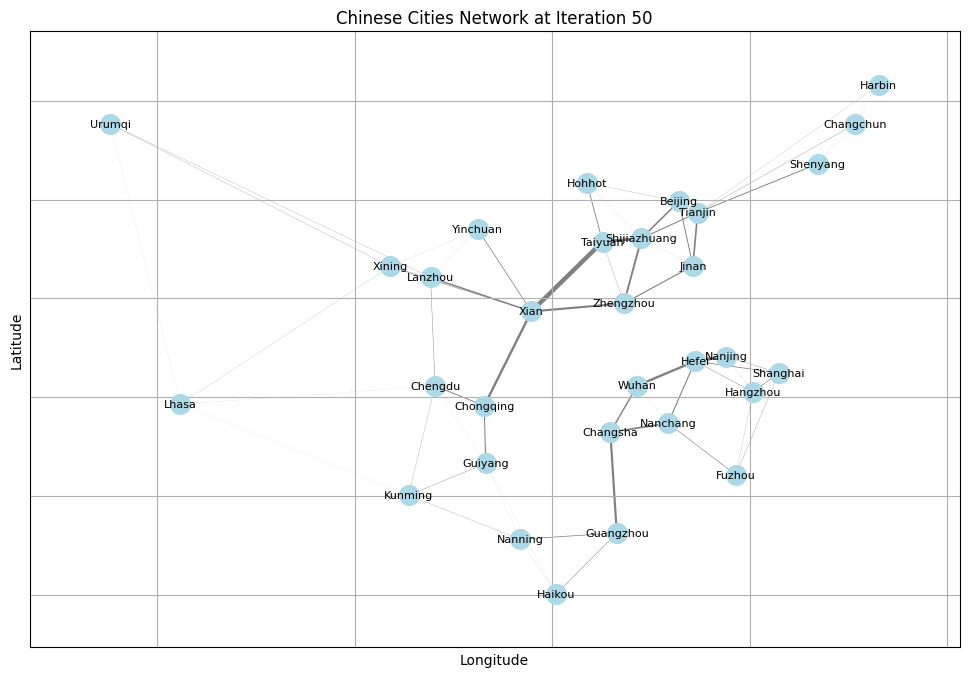

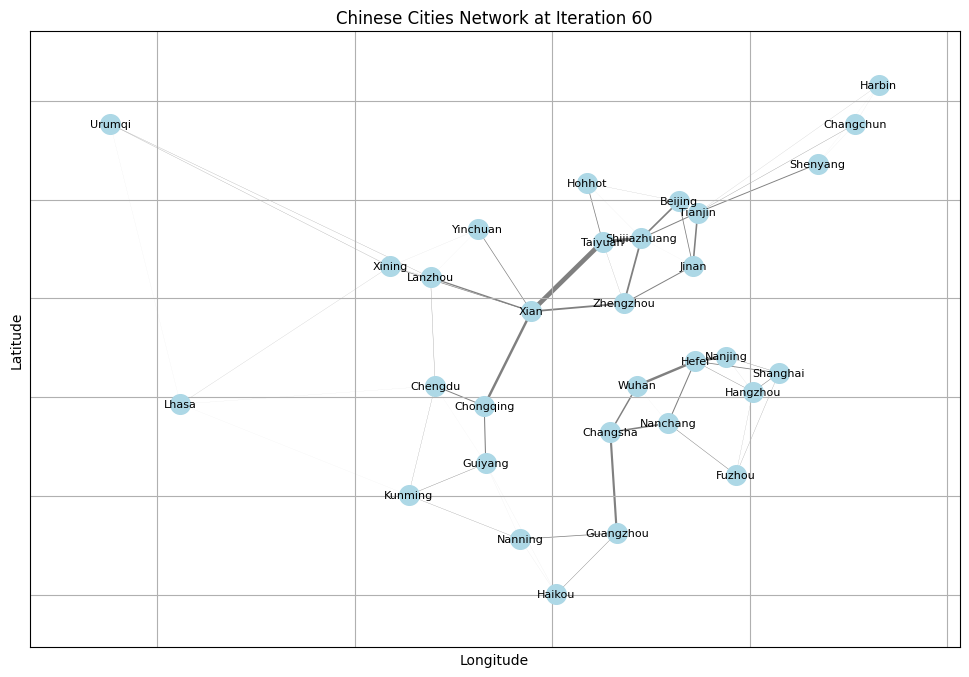

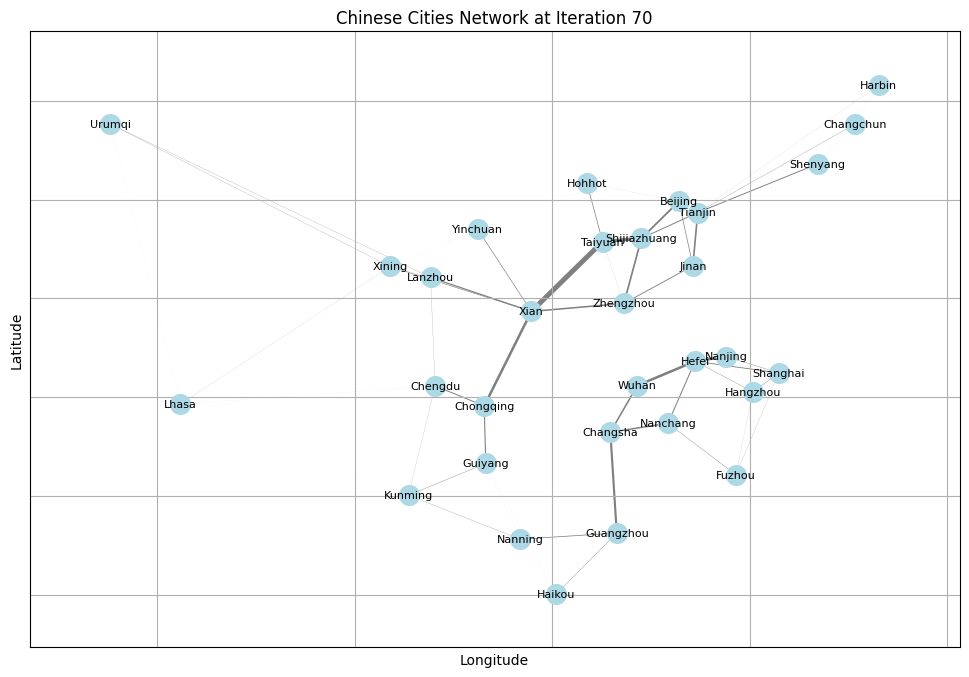

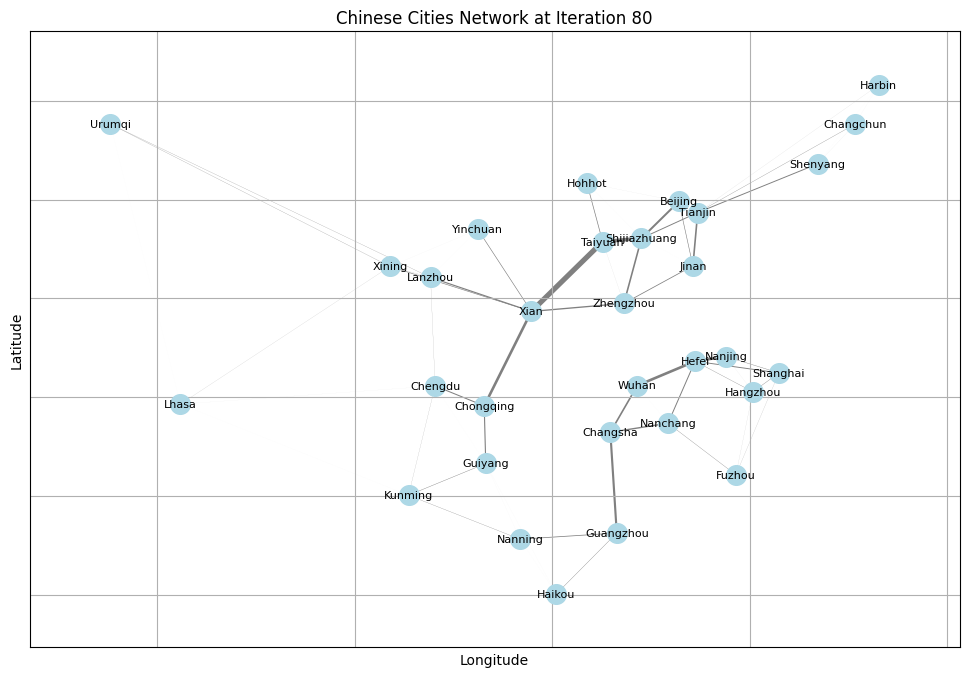

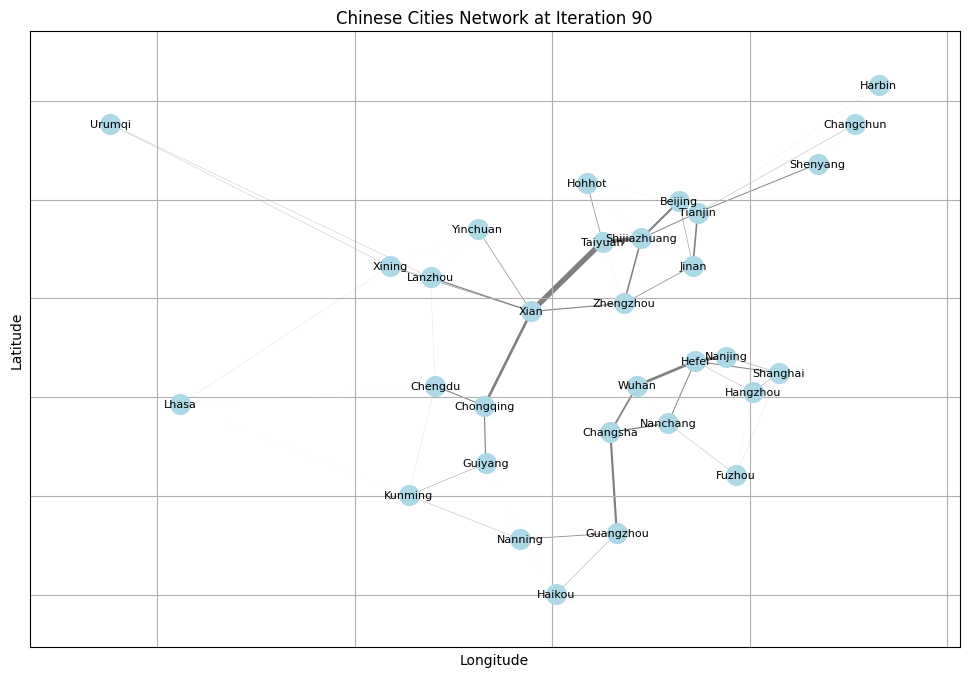

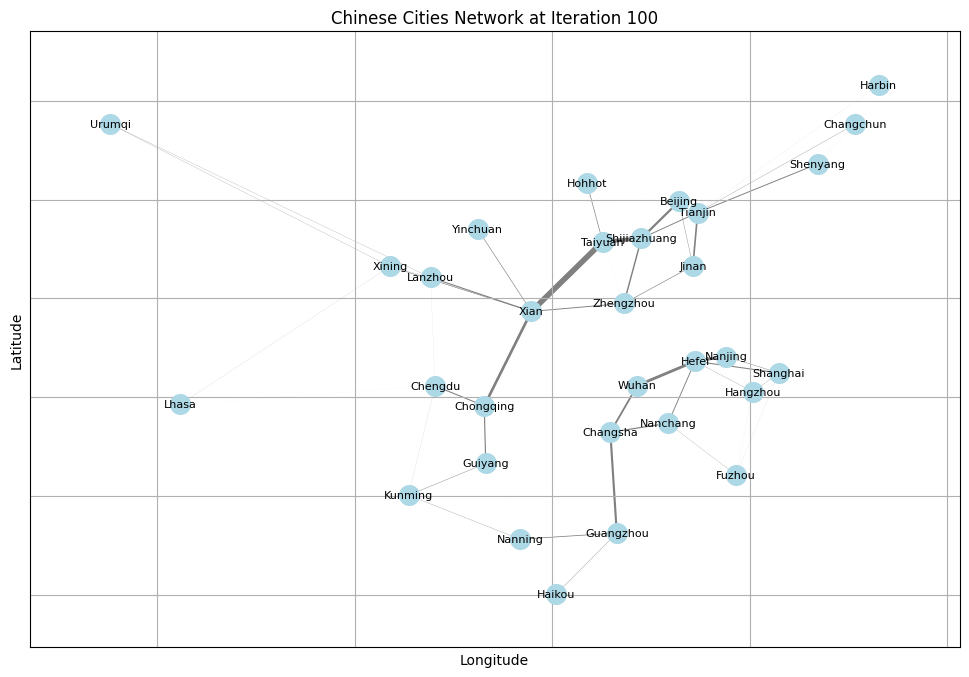

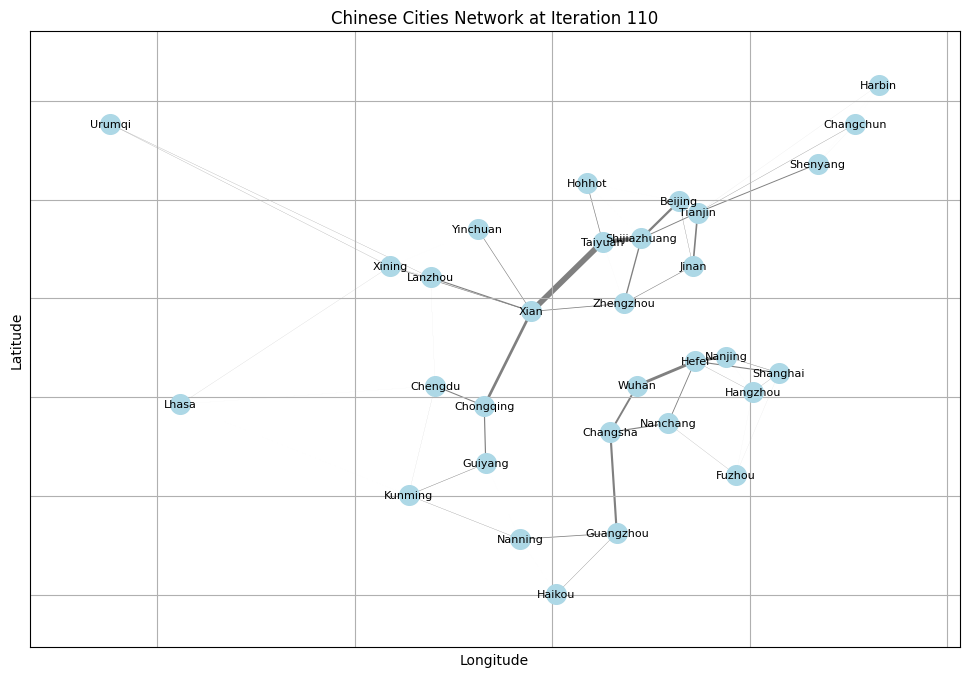

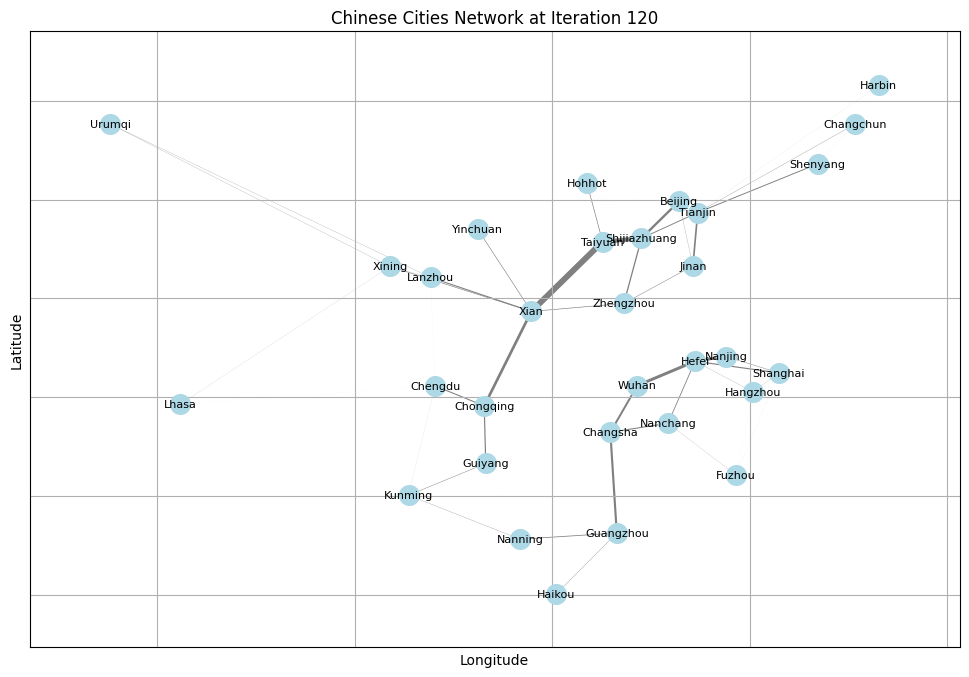

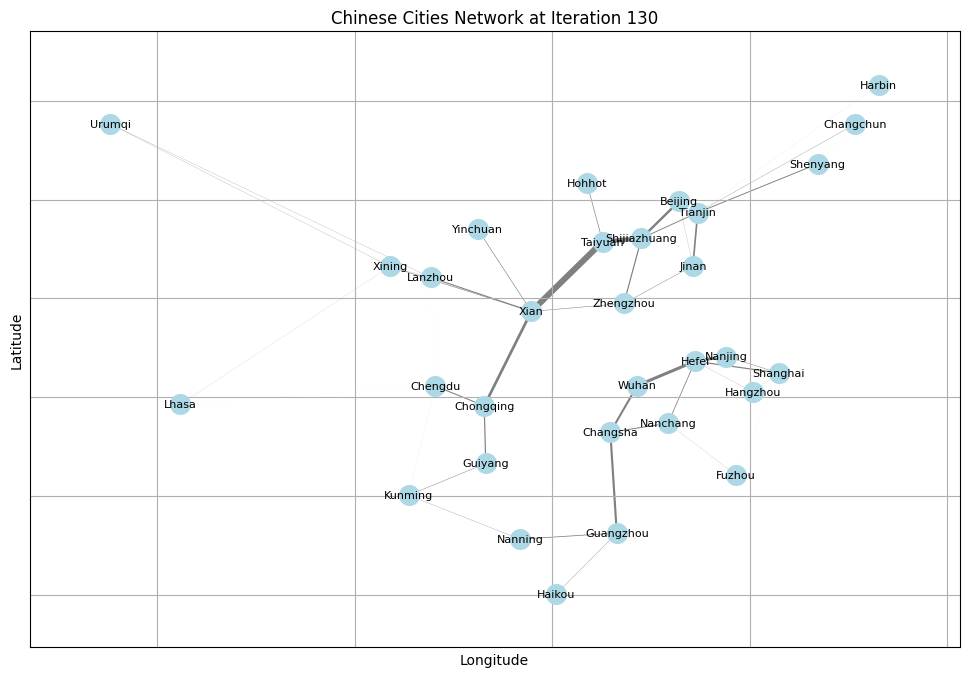

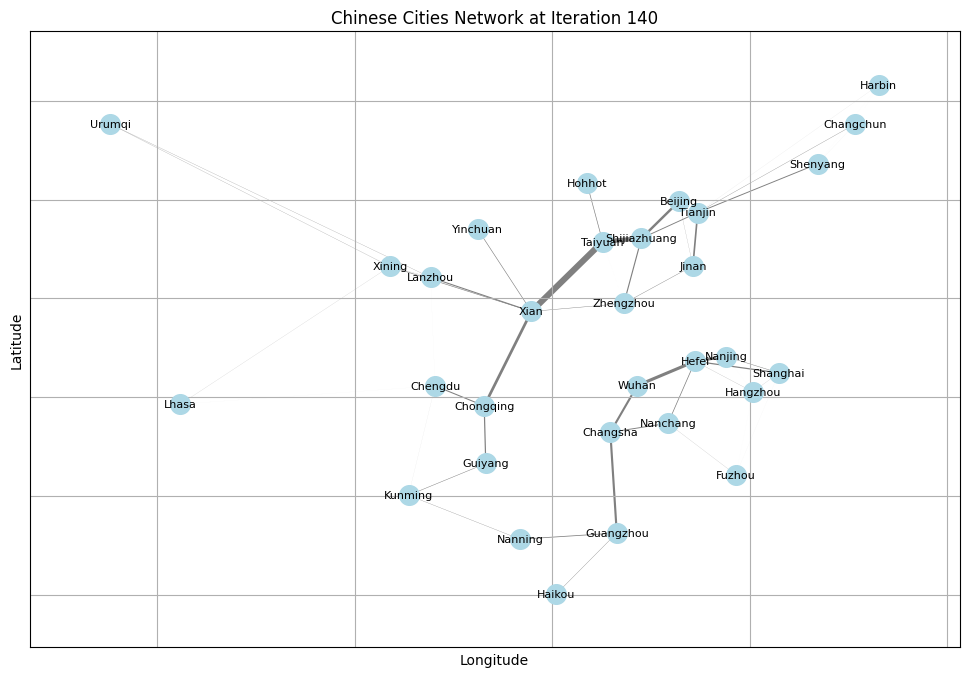

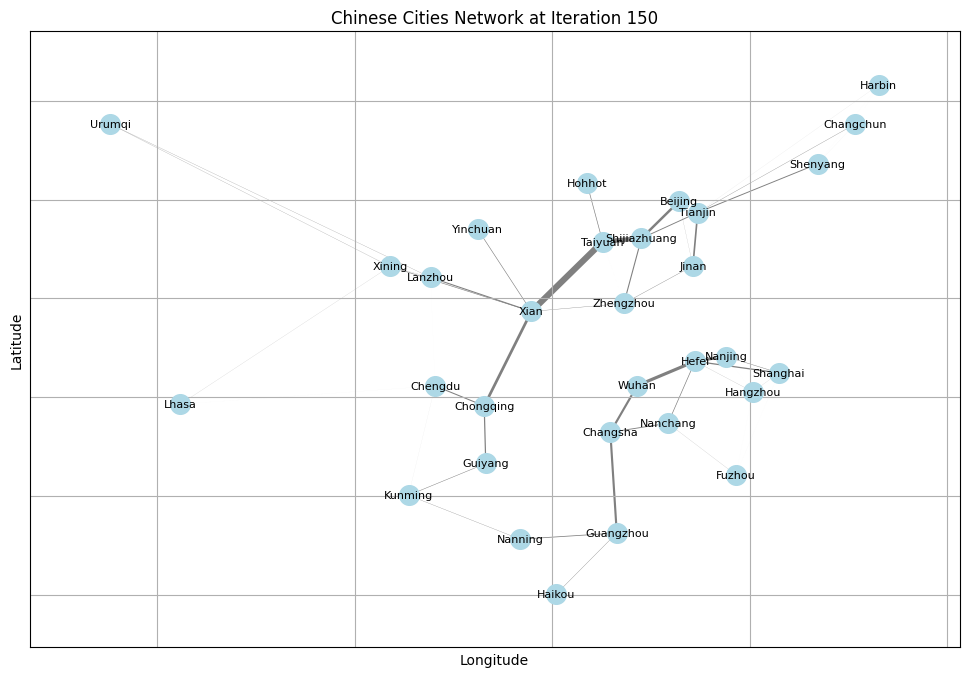

Converged after 156 iterations.


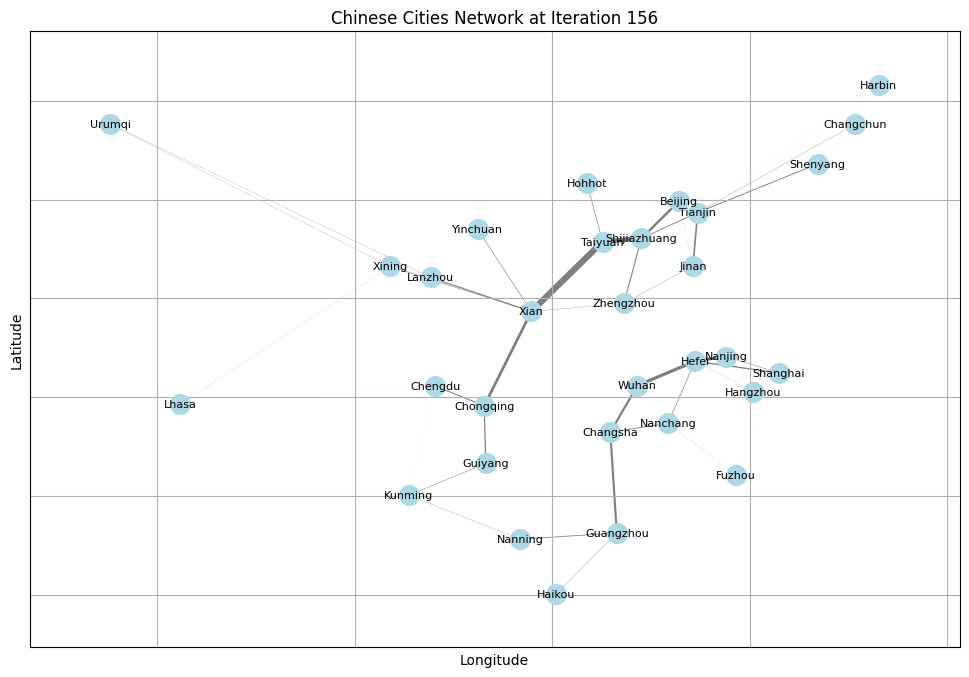


Final Conductivities (D_ij) on edges:
Edge Beijing-Tianjin: D_ij = 0.0000
Edge Beijing-Shijiazhuang: D_ij = 0.3576
Edge Beijing-Jinan: D_ij = 0.0153
Edge Beijing-Hohhot: D_ij = 0.0000
Edge Tianjin-Shijiazhuang: D_ij = 0.1318
Edge Tianjin-Jinan: D_ij = 0.2394
Edge Tianjin-Shenyang: D_ij = 0.1358
Edge Tianjin-Changchun: D_ij = 0.0446
Edge Tianjin-Harbin: D_ij = 0.0069
Edge Shijiazhuang-Taiyuan: D_ij = 0.6633
Edge Shijiazhuang-Jinan: D_ij = 0.0000
Edge Shijiazhuang-Hohhot: D_ij = 0.0000
Edge Shijiazhuang-Zhengzhou: D_ij = 0.1524
Edge Taiyuan-Hohhot: D_ij = 0.0937
Edge Taiyuan-Zhengzhou: D_ij = 0.0001
Edge Taiyuan-Xian: D_ij = 0.8962
Edge Shenyang-Changchun: D_ij = 0.0028
Edge Shenyang-Harbin: D_ij = 0.0002
Edge Changchun-Harbin: D_ij = 0.0002
Edge Shanghai-Hangzhou: D_ij = 0.0112
Edge Shanghai-Nanjing: D_ij = 0.0627
Edge Shanghai-Hefei: D_ij = 0.1825
Edge Shanghai-Fuzhou: D_ij = 0.0010
Edge Nanjing-Hefei: D_ij = 0.3779
Edge Nanjing-Hangzhou: D_ij = 0.0002
Edge Hangzhou-Hefei: D_ij = 0.01

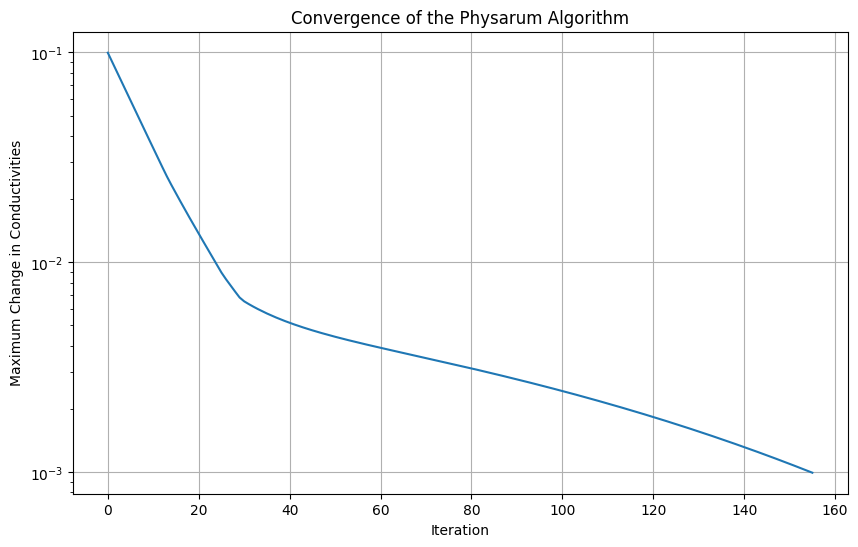

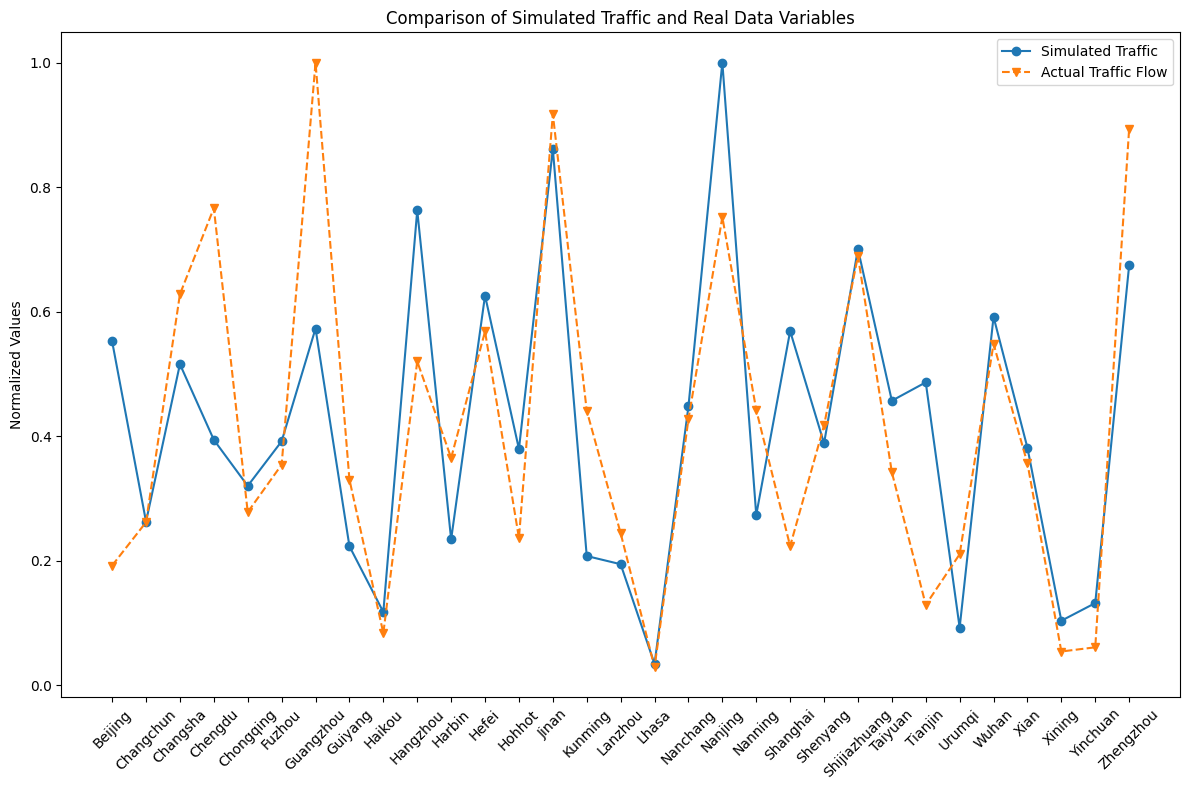

Correlation coefficients between simulated traffic and real data variables:
Actual Traffic Flow: 0.7236


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

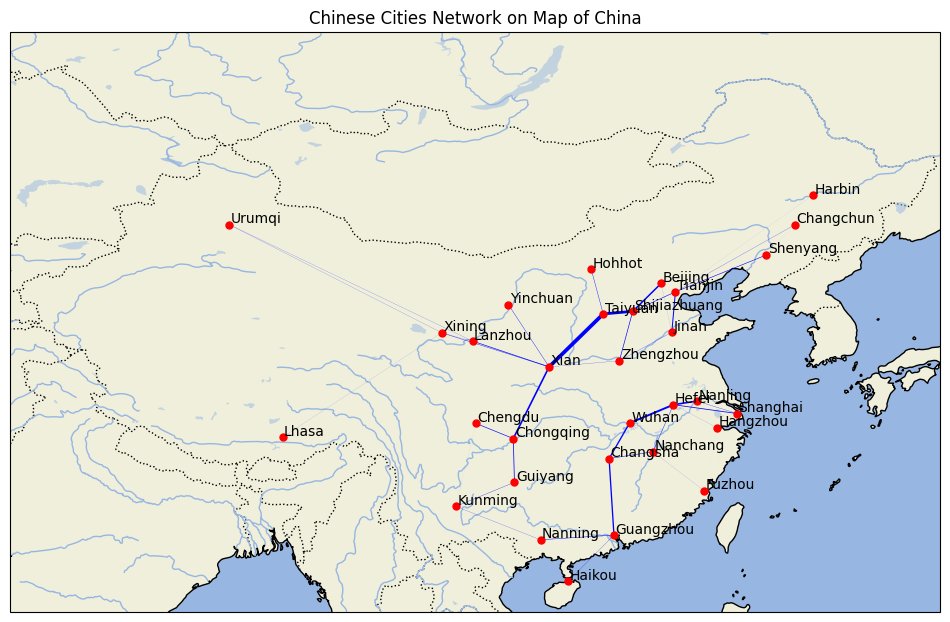

In [6]:
# ================================================
# Gravity Based Model 1: Chinese Cities Network (maango5)
# ================================================

# This script implements the Physarum Polycephalum-inspired network design algorithm
# applied to a more comprehensive map of China with additional cities.
# It combines the gravity model with the Physarum algorithm to simulate
# the formation of efficient transportation networks between these cities.
# In this version (maango5), the city data includes additional variables,
# and we plot these variables together.

# ------------------------------------------------
# Import Necessary Libraries
# ------------------------------------------------

import numpy as np              # For numerical calculations
import networkx as nx           # For creating and manipulating graphs
import matplotlib.pyplot as plt # For visualizing the network
from math import radians, cos, sin, asin, sqrt  # For calculating distances
import cartopy.crs as ccrs      # For mapping
import cartopy.feature as cfeature  # For adding features to the map
import time                     # For adding delays (optional)

# ------------------------------------------------
# Step 1: Input City Data from User
# ------------------------------------------------

# User-provided data (note: data for Orléans is completed with reasonable estimates)

data = [
    {"City": "Beijing", "State": "Beijing", "Population": 20190000, "Economic Power (10^9 RMB)": 16251.9393, "Actual Traffic Flow (10^4)": 2019, "Latitude (°N)": 39.9042, "Longitude (°E)": 116.4074},
    {"City": "Tianjin", "State": "Tianjin", "Population": 13550000, "Economic Power (10^9 RMB)": 11307.2828, "Actual Traffic Flow (10^4)": 1355, "Latitude (°N)": 39.3434, "Longitude (°E)": 117.3616},
    {"City": "Shijiazhuang", "State": "Hebei Province", "Population": 72410000, "Economic Power (10^9 RMB)": 24515.7676, "Actual Traffic Flow (10^4)": 7241, "Latitude (°N)": 38.0428, "Longitude (°E)": 114.5149},
    {"City": "Taiyuan", "State": "Shanxi Province", "Population": 35930000, "Economic Power (10^9 RMB)": 11237.5555, "Actual Traffic Flow (10^4)": 3593, "Latitude (°N)": 37.8706, "Longitude (°E)": 112.5489},
    {"City": "Hohhot", "State": "Inner Mongolian Autonomous Region", "Population": 24820000, "Economic Power (10^9 RMB)": 14359.88, "Actual Traffic Flow (10^4)": 2482, "Latitude (°N)": 40.8426, "Longitude (°E)": 111.7492},
    {"City": "Shenyang", "State": "Liaoning Province", "Population": 43830000, "Economic Power (10^9 RMB)": 22226.70, "Actual Traffic Flow (10^4)": 4383, "Latitude (°N)": 41.8057, "Longitude (°E)": 123.4315},
    {"City": "Changchun", "State": "Jilin Province", "Population": 27490000, "Economic Power (10^9 RMB)": 10568.83, "Actual Traffic Flow (10^4)": 2749, "Latitude (°N)": 43.8171, "Longitude (°E)": 125.3235},
    {"City": "Harbin", "State": "Heilongjiang Province", "Population": 38430000, "Economic Power (10^9 RMB)": 12582.00, "Actual Traffic Flow (10^4)": 3834, "Latitude (°N)": 45.8038, "Longitude (°E)": 126.5349},
    {"City": "Shanghai", "State": "Shanghai", "Population": 23470000, "Economic Power (10^9 RMB)": 19195.69, "Actual Traffic Flow (10^4)": 2347, "Latitude (°N)": 31.2304, "Longitude (°E)": 121.4737},
    {"City": "Nanjing", "State": "Jiangsu Province", "Population": 78990000, "Economic Power (10^9 RMB)": 49110.27, "Actual Traffic Flow (10^4)": 7899, "Latitude (°N)": 32.0603, "Longitude (°E)": 118.7969},
    {"City": "Hangzhou", "State": "Zhejiang Province", "Population": 54630000, "Economic Power (10^9 RMB)": 32318.85, "Actual Traffic Flow (10^4)": 5463, "Latitude (°N)": 30.2741, "Longitude (°E)": 120.1551},
    {"City": "Hefei", "State": "Anhui Province", "Population": 59680000, "Economic Power (10^9 RMB)": 15300.65, "Actual Traffic Flow (10^4)": 5968, "Latitude (°N)": 31.8206, "Longitude (°E)": 117.2290},
    {"City": "Fuzhou", "State": "Fujian Province", "Population": 37200000, "Economic Power (10^9 RMB)": 17560.18, "Actual Traffic Flow (10^4)": 3720, "Latitude (°N)": 26.0745, "Longitude (°E)": 119.2965},
    {"City": "Nanchang", "State": "Jiangxi Province", "Population": 44880000, "Economic Power (10^9 RMB)": 11702.82, "Actual Traffic Flow (10^4)": 4488, "Latitude (°N)": 28.6829, "Longitude (°E)": 115.8582},
    {"City": "Jinan", "State": "Shandong Province", "Population": 96370000, "Economic Power (10^9 RMB)": 45361.85, "Actual Traffic Flow (10^4)": 9637, "Latitude (°N)": 36.6512, "Longitude (°E)": 117.1201},
    {"City": "Zhengzhou", "State": "Henan Province", "Population": 93880000, "Economic Power (10^9 RMB)": 26931.03, "Actual Traffic Flow (10^4)": 9388, "Latitude (°N)": 34.7466, "Longitude (°E)": 113.6254},
    {"City": "Wuhan", "State": "Hubei Province", "Population": 57580000, "Economic Power (10^9 RMB)": 19632.26, "Actual Traffic Flow (10^4)": 5758, "Latitude (°N)": 30.5928, "Longitude (°E)": 114.3055},
    {"City": "Changsha", "State": "Hunan Province", "Population": 65960000, "Economic Power (10^9 RMB)": 19669.56, "Actual Traffic Flow (10^4)": 6596, "Latitude (°N)": 28.2282, "Longitude (°E)": 112.9388},
    {"City": "Guangzhou", "State": "Guangdong Province", "Population": 105050000, "Economic Power (10^9 RMB)": 53210.28, "Actual Traffic Flow (10^4)": 10505, "Latitude (°N)": 23.1291, "Longitude (°E)": 113.2644},
    {"City": "Nanning", "State": "Guangxi Province", "Population": 46450000, "Economic Power (10^9 RMB)": 11720.87, "Actual Traffic Flow (10^4)": 4645, "Latitude (°N)": 22.8170, "Longitude (°E)": 108.3669},
    {"City": "Haikou", "State": "Hainan Province", "Population": 8770000, "Economic Power (10^9 RMB)": 2522.66, "Actual Traffic Flow (10^4)": 877, "Latitude (°N)": 20.0445, "Longitude (°E)": 110.1999},
    {"City": "Chongqing", "State": "Chongqing", "Population": 29190000, "Economic Power (10^9 RMB)": 10011.37, "Actual Traffic Flow (10^4)": 2919, "Latitude (°N)": 29.5630, "Longitude (°E)": 106.5516},
    {"City": "Chengdu", "State": "Sichuan Province", "Population": 80500000, "Economic Power (10^9 RMB)": 21026.68, "Actual Traffic Flow (10^4)": 8050, "Latitude (°N)": 30.5728, "Longitude (°E)": 104.0668},
    {"City": "Guiyang", "State": "Guizhou Province", "Population": 34690000, "Economic Power (10^9 RMB)": 5701.84, "Actual Traffic Flow (10^4)": 3469, "Latitude (°N)": 26.6477, "Longitude (°E)": 106.6302},
    {"City": "Kunming", "State": "Yunnan Province", "Population": 46310000, "Economic Power (10^9 RMB)": 8893.12, "Actual Traffic Flow (10^4)": 4631, "Latitude (°N)": 25.0406, "Longitude (°E)": 102.7185},
    {"City": "Lhasa", "State": "Tibet Autonomous Region", "Population": 3030000, "Economic Power (10^9 RMB)": 605.83, "Actual Traffic Flow (10^4)": 303, "Latitude (°N)": 29.6520, "Longitude (°E)": 91.1721},
    {"City": "Xian", "State": "Shaanxi Province", "Population": 37430000, "Economic Power (10^9 RMB)": 12512.30, "Actual Traffic Flow (10^4)": 3743, "Latitude (°N)": 34.3416, "Longitude (°E)": 108.9398},
    {"City": "Lanzhou", "State": "Gansu Province", "Population": 25640000, "Economic Power (10^9 RMB)": 5020.37, "Actual Traffic Flow (10^4)": 2564, "Latitude (°N)": 36.0611, "Longitude (°E)": 103.8343},
    {"City": "Xining", "State": "Qinghai Province", "Population": 5680000, "Economic Power (10^9 RMB)": 1670.44, "Actual Traffic Flow (10^4)": 568, "Latitude (°N)": 36.6171, "Longitude (°E)": 101.7789},
    {"City": "Yinchuan", "State": "Ningxia Hui Autonomous Region", "Population": 6390000, "Economic Power (10^9 RMB)": 2102.21, "Actual Traffic Flow (10^4)": 639, "Latitude (°N)": 38.4872, "Longitude (°E)": 106.2309},
    {"City": "Urumqi", "State": "Xinjiang Uyghur Autonomous Region", "Population": 24820000, "Economic Power (10^9 RMB)": 6610.05, "Actual Traffic Flow (10^4)": 2209, "Latitude (°N)": 43.8256, "Longitude (°E)": 87.6168},
]








# ------------------------------------------------
# Step 2: Define the Network (Cities and Connections)
# ------------------------------------------------

# Create an undirected graph to represent the network
G = nx.Graph()

# Add nodes representing cities, each with associated data
cities = {}
for city_data in data:
    city_name = city_data["City"]
    GDP = city_data["Economic Power (10^9 RMB)"]
    Actual_Traffic_Flow = city_data["Actual Traffic Flow (10^4)"]
    lat = city_data["Latitude (°N)"]
    lon = city_data["Longitude (°E)"]
    G.add_node(city_name,
               GDP=GDP,
               lat=lat,
               lon=lon,
               Actual_Traffic_Flow=Actual_Traffic_Flow
               )
    cities[city_name] = {
        'GDP': GDP,
        'lat': lat,
        'lon': lon,
        'Actual_Traffic_Flow': Actual_Traffic_Flow,
    }

# Function to calculate the Haversine distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface given their latitude and longitude in degrees.
    """
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Manually define edges between cities
# We'll connect each city to its 3 nearest neighbors based on distance

# Function to find the N nearest neighbors for each city
def find_nearest_neighbors(G, N=3):
    edges = []
    nodes = list(G.nodes(data=True))
    for i, (city1, data1) in enumerate(nodes):
        distances = []
        for j, (city2, data2) in enumerate(nodes):
            if city1 != city2:
                dist = haversine_distance(data1['lat'], data1['lon'], data2['lat'], data2['lon'])
                distances.append((city2, dist))
        # Sort by distance and select N nearest neighbors
        distances.sort(key=lambda x: x[1])
        for k in range(N):
            neighbor_city, distance = distances[k]
            # To avoid duplicate edges, only add if not already present
            if not G.has_edge(city1, neighbor_city):
                edges.append((city1, neighbor_city, distance))
    return edges

# Find and add edges to the graph
edges = find_nearest_neighbors(G, N=3)  # Connect each city to its 3 nearest neighbors

# Add edges to the graph with calculated distances as lengths
for city1, city2, distance in edges:
    G.add_edge(city1, city2, length=distance)

# ------------------------------------------------
# Step 3: Gravity Model to Estimate Traffic Flows
# ------------------------------------------------

# The gravity model estimates the traffic flow between two cities based on their GDPs and distance.

# Parameters for the gravity model
alpha1 = 0.5  # Exponent for GDP of the origin city
alpha2 = 0.5  # Exponent for GDP of the destination city
alpha3 = 1    # Exponent for distance (distance decay)
r = 1         # Scaling constant

# Function to calculate traffic flows using the gravity model (unidirectional flows)
def calculate_traffic_flow(G, r, alpha1, alpha2, alpha3):
    """
    Calculate the traffic flows F_ij between nodes using the gravity model.
    """
    traffic_flows = {}          # Dictionary to store traffic flows F_ij
    nodes = list(G.nodes(data=True))     # List of all nodes with data

    for i, data_i in nodes:
        for j, data_j in nodes:
            if i != j and (i, j) not in traffic_flows and (j, i) not in traffic_flows:
                GDP_i = data_i['GDP']
                GDP_j = data_j['GDP']
                # Calculate the distance between the two cities
                dist = haversine_distance(data_i['lat'], data_i['lon'], data_j['lat'], data_j['lon'])
                # Compute F_ij using the gravity model formula
                F_ij = r * ((GDP_i ** alpha1) * (GDP_j ** alpha2)) / (dist ** alpha3)
                traffic_flows[(i, j)] = F_ij
    return traffic_flows

# Calculate the traffic flows between cities
traffic_flows = calculate_traffic_flow(G, r, alpha1, alpha2, alpha3)

# Normalize the traffic flows to prevent numerical instability
max_flow = max(traffic_flows.values())
traffic_flows = {k: v / max_flow for k, v in traffic_flows.items()}

# Display the calculated (normalized) traffic flows
print("Traffic Flows (F_ij) between nodes (normalized):")
for key, value in list(traffic_flows.items())[:10]:  # Display first 10 flows
    print(f"From {key[0]} to {key[1]}: {value:.4f}")

# ------------------------------------------------
# Step 4: Physarum Algorithm for Network Adaptation
# ------------------------------------------------

# Initialize the conductivities D_ij for each edge in the network
for u, v, data in G.edges(data=True):
    data['D_ij'] = 1.0          # Initial conductivity of the edge
    data['Q_ij'] = 0.0          # Initialize flux through the edge
    data['L_ij'] = data['length']  # Length of the edge as given

# Parameters for the Physarum algorithm
gamma = 10.0        # Decay rate
delta_t = 0.01      # Time step to control changes per iteration
max_iterations = 1000  # Maximum number of iterations
tolerance = 1e-3    # Tolerance for convergence

# Lists to store data for plotting
max_changes = []    # To store the maximum change in conductivities at each iteration
conductivity_history = {}  # To store conductivities over time

# Initialize conductivity history
for u, v in G.edges():
    conductivity_history[(u, v)] = [G[u][v]['D_ij']]

# Function to assemble the conductance matrix A and the right-hand side vector b
def assemble_conductance_matrix(G, F_ij):
    """
    Assemble the conductance matrix A and the right-hand side vector b for the system A*p = b.
    """
    nodes = list(G.nodes())                    # List of nodes
    n = len(nodes)                             # Number of nodes
    node_indices = {node: i for i, node in enumerate(nodes)}  # Mapping from node labels to indices
    A = np.zeros((n, n))                       # Initialize the conductance matrix A
    b = np.zeros(n)                            # Initialize the right-hand side vector b

    # Build the conductance matrix A based on the current conductivities
    for u, v, data in G.edges(data=True):
        i = node_indices[u]                    # Index of node u
        j = node_indices[v]                    # Index of node v
        D_ij = data['D_ij']                    # Conductivity of edge (u, v)
        L_ij = data['L_ij']                    # Length of edge (u, v)
        conductance = D_ij / L_ij              # Conductance between nodes u and v

        # Update the conductance matrix A
        A[i, i] += conductance                 # Add conductance to diagonal elements
        A[j, j] += conductance
        A[i, j] -= conductance                 # Subtract conductance from off-diagonal elements
        A[j, i] -= conductance

    # Apply traffic flows F_ij as sources and sinks in the system
    for (origin, dest), flow in F_ij.items():
        i = node_indices[origin]               # Index of origin node
        j = node_indices[dest]                 # Index of destination node
        b[i] -= flow                           # Source node (negative flow)
        b[j] += flow                           # Sink node (positive flow)

    # Fix the pressure at a reference node to zero to ensure a unique solution
    ref_node = nodes[0]                         # Reference node (first node)
    ref_index = node_indices[ref_node]         # Index of the reference node
    A[ref_index, :] = 0                        # Set the entire row corresponding to the reference node to zero
    A[ref_index, ref_index] = 1                # Set the diagonal element to one
    b[ref_index] = 0                           # Set the right-hand side value to zero

    return A, b, node_indices

# Function to calculate the fluxes Q_ij based on the current pressures
def calculate_fluxes(G, pressures, node_indices):
    """
    Calculate the flux Q_ij on each edge based on the pressures at the nodes.
    """
    for u, v, data in G.edges(data=True):
        i = node_indices[u]                    # Index of node u
        j = node_indices[v]                    # Index of node v
        D_ij = data['D_ij']                    # Conductivity of edge (u, v)
        L_ij = data['L_ij']                    # Length of edge (u, v)
        p_i = pressures[i]                     # Pressure at node i
        p_j = pressures[j]                     # Pressure at node j
        # Calculate the flux Q_ij using Ohm's law analogy
        Q_ij = D_ij * (p_i - p_j) / L_ij
        data['Q_ij'] = Q_ij                    # Store the flux in the edge data

# Function to update the conductivities D_ij based on the fluxes Q_ij
def update_conductivities(G):
    """
    Update the conductivities D_ij based on the fluxes Q_ij using the Physarum update rule.
    """
    max_change = 0.0                           # To keep track of the maximum change in conductivities
    D_ij_max = 10.0                            # Maximum allowable conductivity to prevent unbounded growth

    for u, v, data in G.edges(data=True):
        D_ij_old = data['D_ij']                # Previous conductivity of edge (u, v)
        Q_ij = data['Q_ij']                    # Flux through edge (u, v)
        # Update the conductivity D_ij using the equation from the article:
        # D_ij_new = D_ij_old + delta_t * (|Q_ij| - gamma * D_ij_old)
        D_ij_new = D_ij_old + delta_t * (abs(Q_ij) - gamma * D_ij_old)
        # Ensure the new conductivity stays within bounds (non-negative and below D_ij_max)
        D_ij_new = min(max(D_ij_new, 0.0), D_ij_max)
        data['D_ij'] = D_ij_new                # Update the conductivity in the edge data
        # Record the conductivity history
        conductivity_history[(u, v)].append(D_ij_new)
        # Calculate the change in conductivity to check for convergence
        change = abs(D_ij_new - D_ij_old)
        if change > max_change:
            max_change = change                # Update max_change if this change is the largest so far
    return max_change

# Function to visualize the network at a given iteration
def visualize_network_dynamic(G, iteration, ax):
    """
    Visualize the network dynamically, showing nodes and edges with conductivities represented by edge thickness.
    """
    ax.clear()
    pos = {city: (data['lon'], data['lat']) for city, data in G.nodes(data=True)}  # Use geographical positions
    # Scale edge widths based on conductivities for visualization
    edge_widths = [data['D_ij'] * 5 for _, _, data in G.edges(data=True)]
    # Edge colors set to grey
    edge_colors = ['grey' for _, _, data in G.edges(data=True)]

    # Draw the edges with scaled widths
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, ax=ax)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue', ax=ax)
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif', ax=ax)
    # Add a title indicating the iteration number
    ax.set_title(f"Chinese Cities Network at Iteration {iteration}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.axis('on')                            # Show axis
    ax.grid(True)
    plt.pause(0.001)  # Small pause to update the plot

# Function to visualize the network as a separate static plot (used in final visualization)
def visualize_network_static(G, iteration):
    """
    Visualize the network, showing nodes and edges with conductivities represented by edge thickness.
    """
    plt.figure(figsize=(12, 8))
    pos = {city: (data['lon'], data['lat']) for city, data in G.nodes(data=True)}  # Use geographical positions
    # Scale edge widths based on conductivities for visualization
    edge_widths = [data['D_ij'] * 5 for _, _, data in G.edges(data=True)]
    # Edge colors set to grey
    edge_colors = ['grey' for _, _, data in G.edges(data=True)]

    # Draw the edges with scaled widths
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    # Add a title indicating the iteration number
    plt.title(f"Chinese Cities Network at Iteration {iteration}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis('on')                            # Show axis
    plt.grid(True)
    plt.show()

# ------------------------------------------------
# Main Loop: Run the Physarum Algorithm
# ------------------------------------------------

# Initialize interactive mode
plt.ion()
fig, ax = plt.subplots(figsize=(12, 8))
visualize_network_dynamic(G, iteration=0, ax=ax)

converged = False                              # Flag to indicate whether the algorithm has converged

# Iteratively update the network until convergence or maximum iterations reached
for iteration in range(1, max_iterations + 1):
    # Assemble the conductance matrix and the RHS vector based on current conductivities
    A, b, node_indices = assemble_conductance_matrix(G, traffic_flows)
    # Solve the linear system A * p = b to find the pressures at the nodes
    try:
        pressures = np.linalg.solve(A, b)
    except np.linalg.LinAlgError as e:
        print(f"Error solving linear system at iteration {iteration}: {e}")
        break
    # Calculate the fluxes on the edges based on the current pressures
    calculate_fluxes(G, pressures, node_indices)
    # Update the conductivities based on the fluxes
    max_change = update_conductivities(G)
    # Record the maximum change for plotting
    max_changes.append(max_change)
    # Visualize the network after this iteration
    visualize_network_dynamic(G, iteration, ax)
    # Optional: Add a short delay to control the speed of visualization
    # time.sleep(0.01)
    # Check if the maximum change is below the convergence tolerance
    if iteration % 10 == 0:
        visualize_network_static(G, iteration)
    if max_change < tolerance:
        print(f"Converged after {iteration} iterations.")
        converged = True
        break

# If convergence was not reached within the maximum number of iterations
if not converged:
    print("Reached maximum iterations without full convergence.")

# Turn off interactive mode
plt.ioff()

# ------------------------------------------------
# Step 5: Display Final Results
# ------------------------------------------------

# Visualize the final network after adaptation
visualize_network_static(G, iteration)

# Print the final conductivities of the edges
print("\nFinal Conductivities (D_ij) on edges:")
for u, v, data in G.edges(data=True):
    print(f"Edge {u}-{v}: D_ij = {data['D_ij']:.4f}")

# ------------------------------------------------
# Step 6: Plotting Convergence Metrics
# ------------------------------------------------

# Plot the maximum change in conductivities over iterations
plt.figure(figsize=(10, 6))
plt.plot(max_changes)
plt.title("Convergence of the Physarum Algorithm")
plt.xlabel("Iteration")
plt.ylabel("Maximum Change in Conductivities")
plt.yscale('log')
plt.grid(True)
plt.show()

# ------------------------------------------------
# Step 7: Compare Simulated Traffic with Real Data
# ------------------------------------------------

# Sum the traffic flows for each city (simulated data)
city_traffic_simulation = {city: 0.0 for city in G.nodes()}
for (origin, dest), flow in traffic_flows.items():
    city_traffic_simulation[origin] += flow
    city_traffic_simulation[dest] += flow

# Real data for each city from the input
city_data_values = {}
for city, data in G.nodes(data=True):
    city_data_values[city] = {
        'Actual_Traffic_Flow': data['Actual_Traffic_Flow']
    }

# Normalize the datasets
max_simulated_traffic = max(city_traffic_simulation.values())
normalized_simulated_traffic = {city: flow / max_simulated_traffic for city, flow in city_traffic_simulation.items()}

# For each variable, normalize the data
variables = ['Actual_Traffic_Flow']
normalized_real_data = {var: {} for var in variables}

for var in variables:
    max_value = max(city_data_values[city][var] for city in G.nodes())
    for city in G.nodes():
        normalized_real_data[var][city] = city_data_values[city][var] / max_value

# Ensure both datasets have the same cities
cities_list = sorted(G.nodes())

# Extract values in order
simulated_values = [normalized_simulated_traffic[city] for city in cities_list]

# Plot the comparison using line plots with dots
plt.figure(figsize=(12, 8))
x = np.arange(len(cities_list))  # the label locations

# Plot simulated traffic
plt.plot(x, simulated_values, marker='o', label='Simulated Traffic', linestyle='-')

# Plot each variable
markers = {'Actual_Traffic_Flow': 'v'}
for var in variables:
    values = [normalized_real_data[var][city] for city in cities_list]
    plt.plot(x, values, marker=markers[var], label=var.replace('_', ' ').title(), linestyle='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Normalized Values')
plt.title('Comparison of Simulated Traffic and Real Data Variables')
plt.xticks(x, cities_list, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Calculate and print the correlation coefficients
print("Correlation coefficients between simulated traffic and real data variables:")
for var in variables:
    real_values = np.array([normalized_real_data[var][city] for city in cities_list])
    correlation = np.corrcoef(simulated_values, real_values)[0, 1]
    print(f"{var.replace('_', ' ').title()}: {correlation:.4f}")

# ------------------------------------------------
# Step 8: Plot Network on Real Map of China
# ------------------------------------------------

# Function to plot the network on a real map of China
def plot_network_on_map(G):
    """
    Plot the network graph on a real map of China ensuring correct scaling.
    """
    plt.figure(figsize=(12, 10))
    # Define the map projection and extent
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([73, 135, 18, 53])  # Longitude and latitude bounds of Iran

    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    # Plot the edges
    for u, v, data in G.edges(data=True):
        lon_u, lat_u = G.nodes[u]['lon'], G.nodes[u]['lat']
        lon_v, lat_v = G.nodes[v]['lon'], G.nodes[v]['lat']
        x_values = [lon_u, lon_v]
        y_values = [lat_u, lat_v]
        ax.plot(x_values, y_values, color='blue', linewidth=data['D_ij'] * 3, transform=ccrs.Geodetic())

    # Plot the nodes
    for city, data in G.nodes(data=True):
        ax.plot(data['lon'], data['lat'], marker='o', color='red', markersize=5, transform=ccrs.Geodetic())
        ax.text(data['lon'] + 0.1, data['lat'] + 0.1, city, transform=ccrs.Geodetic())

    plt.title('Chinese Cities Network on Map of China')
    plt.show()

# Plot the network on the map
plot_network_on_map(G)
